In [13]:
from matplotlib import pyplot as plt
from datetime import  timedelta
import pandas
import matplotlib
matplotlib.style.use("ggplot")

In [14]:
import os 
os.getcwd()

'C:\\Users\\fisher\\Documents\\code\\stock_market\\amount'

In [15]:
cpi_ppi = pandas.read_csv("ppi_cpi.csv",encoding="gbk",index_col=0)
cpi_ppi.index = pandas.to_datetime(cpi_ppi.index)
cpi_ppi.columns
## delta  是两者之差

Index([u'PPIRM:当月同比', u'CPI:当月同比', u'delta'], dtype='object')

In [16]:
market = pandas.read_csv(u"C:\\Users\\fisher\\Documents\\金融\\index_data\\shzz_index.csv",encoding="gbk",index_col=0)
## 上证的数据
sz =market
sz.index = pandas.to_datetime(sz.index)
sz = sz.sort_index()

In [17]:
## 调整到月频率的数据
delta = (sz.close.resample("m").last() -sz.open.resample("m").first())/sz.open.resample("m").first()
delta.index = delta.index+timedelta(1)## 数据对齐

In [18]:
## 合在一起
df = pandas.concat([delta,cpi_ppi.delta],axis=1)


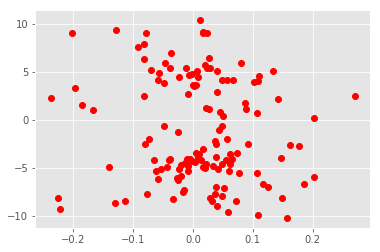

,0,delta
0,1.000000,-0.126542
delta,-0.126542,1.000000


In [19]:
## 查看相关性  经测试，长短期都是负相关
plt.plot(df[0] ,df["delta"],"ro")
plt.show()
df.corr()

In [20]:
## 确定信号
df["signal"] = df.delta < df.delta.shift(1)

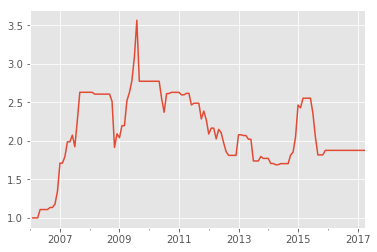

In [21]:
## 计算收益
gain = 1+df["signal"].shift(1)*df[0]
gain.cumprod().plot()
plt.show()



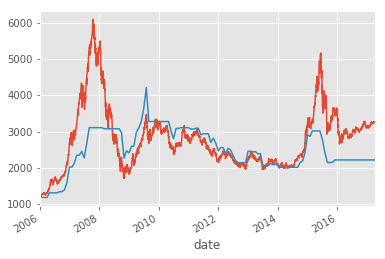

In [23]:
sz.close.plot()
(sz.close[0]*gain.cumprod()).plot()
plt.show()
